In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [3]:
df = pd.read_csv("indonesia_socioecomomic_2021.csv")
df.head()

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577


In [4]:
poor_by_province = df.groupby('province')['poorpeople_percentage'].mean().sort_values(ascending=False)
poor_by_province = pd.DataFrame(poor_by_province).reset_index()
poor_by_province.head(34).style.background_gradient(cmap='inferno')

,province,poorpeople_percentage
0,Papua,28.379310
1,Papua Barat,25.330000
2,Nusa Tenggara Timur,21.748182
3,Maluku,21.444545
4,Gorontalo,15.738333
5,Aceh,15.693913
6,Bengkulu,14.929000
7,Nusa Tenggara Barat,14.279000
8,Sulawesi Tengah,13.514615
9,DI Yogyakarta,13.288000


In [5]:
gdp_by_province = df.groupby('province')['reg_gdp'].mean().sort_values(ascending=False)
gdp_by_province = pd.DataFrame(gdp_by_province).reset_index()
gdp_by_province.head(34).style.background_gradient(cmap='inferno')

,province,reg_gdp
0,DKI Jakarta,465.185667
1,Papua Barat,160.716923
2,Banten,78.916125
3,Jawa Barat,78.591111
4,Riau,61.057083
5,Kalimantan Timur,60.943900
6,Jawa Timur,60.618605
7,Jawa Tengah,38.493371
8,Kepulauan Riau,36.033714
9,DI Yogyakarta,27.678600


In [6]:
gdp_by_province['reg_gdp'].min()

4.2564

In [7]:
poor_vs_gdp = pd.merge(poor_by_province, gdp_by_province, on='province', how='outer')
poor_vs_gdp.head(34).style.background_gradient(cmap='inferno')

,province,poorpeople_percentage,reg_gdp
0,Papua,28.379310,6.902552
1,Papua Barat,25.330000,160.716923
2,Nusa Tenggara Timur,21.748182,4.905318
3,Maluku,21.444545,4.260091
4,Gorontalo,15.738333,6.981667
5,Aceh,15.693913,7.241043
6,Bengkulu,14.929000,7.338900
7,Nusa Tenggara Barat,14.279000,13.432500
8,Sulawesi Tengah,13.514615,15.202538
9,DI Yogyakarta,13.288000,27.678600


AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

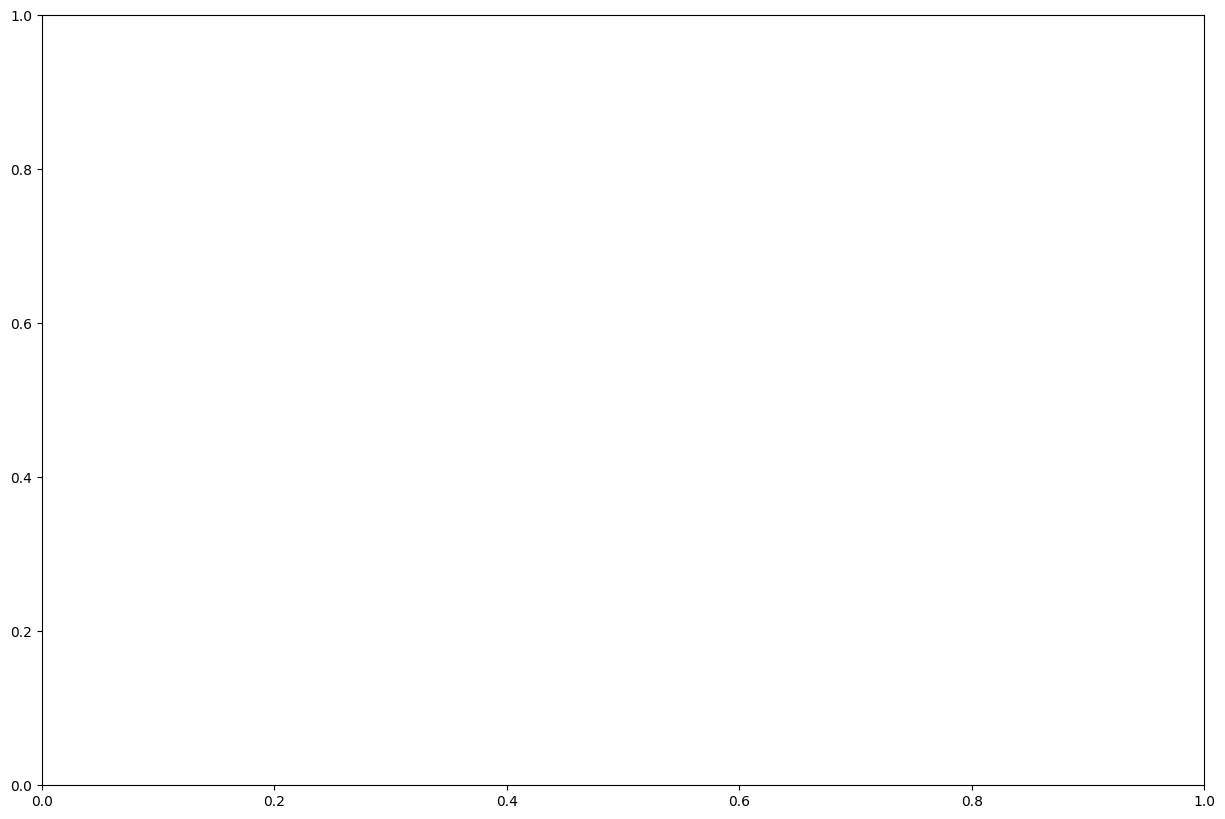

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
poor_vs_gdp.plot(column='reg_gdp', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adding a title
plt.title('GDP by Province in Indonesia', fontsize=16)

# Display the map
plt.show()